In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [239]:
#This code prevents the kernel from stopping when XGBoost is running
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

In [154]:
#allows us to view all columns in pandas df
pd.set_option('display.max_columns', 500)

In [155]:
#read in csv
df = pd.read_csv('cleaned_df.csv')

In [157]:
#drop column
df = df.drop('Unnamed: 0', axis = 1)

In [549]:
#preview df
df.shape

(858, 40)

In [495]:
#create list of features to be used as X variable
used_features = ['>= 3 Pregnancies_1', 'Been Pregnant_1', 'Dx_1', 'Dx:Cancer_1',
       'Dx:CIN_1', 'Dx:HPV_1', 'Hinselmann_1', 'Citology_1', 'Age', 'Number of sexual partners',
        'First sexual intercourse', 'Num of pregnancies', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'STDs (number)']

In [415]:
#set X and y
X = df[used_features]
y = df['Biopsy_1']

In [417]:
# X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
# X_new

In [418]:
# X.columns[X_new.get_support(indices=True)].tolist()

<h1>TRAIN TEST SPLIT

In [419]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state=0)

Biopsy Values:<br>
0 = Biopsy test negative <br>
1 = Biopsy test positive

In [538]:
#check imbalance of test set
y_test.value_counts()

0    325
1     19
Name: Biopsy_1, dtype: int64

In [420]:
scale_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)',
       'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']

In [421]:
#standard scale our training data
# standard_scaler = StandardScaler()
# X_train_scaled = standard_scaler.fit_transform(X_train[scale_cols])


In [422]:
#transform our test data using the scaled parameters
# X_test = standard_scaler.transform(X_test[scale_cols])
# X_test

<h1>SMOTE RESAMPLING

In [423]:

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [424]:
from imblearn.over_sampling import SMOTE

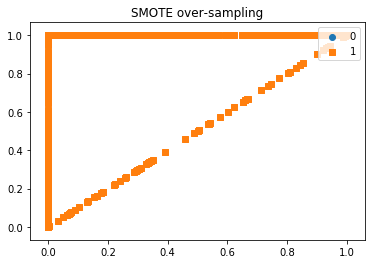

In [539]:
smote = SMOTE(ratio='minority')
X_train_smote, y_train_smote = smote.fit_sample(X, y)

plot_2d_space(X_train_smote, y_train_smote, 'SMOTE over-sampling')

In [542]:
X_train_smote

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.5307385 ,  1.561477  ],
       [ 1.        ,  1.        ,  0.        , ...,  1.        ,
        12.79142762,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.36451556,
         0.09112889,  0.        ]])

In [426]:
X_test.head()

,>= 3 Pregnancies_1,Been Pregnant_1,Dx_1,Dx:Cancer_1,Dx:CIN_1,Dx:HPV_1,Hinselmann_1,Citology_1,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),STDs (number)
144,0,1,0,0,0,0,0,0,30,2.0,17.0,1.0,0.000000,1.0,1.0,0.0
774,1,1,0,0,0,0,0,0,43,4.0,16.0,3.0,7.000000,0.0,0.0,0.0
263,1,1,0,0,0,0,0,0,23,2.0,14.0,7.0,0.513202,0.0,0.0,0.0
788,1,1,0,0,0,0,0,1,38,2.0,19.0,5.0,0.000000,1.0,30.0,0.0
847,0,1,0,0,0,0,0,0,30,3.0,22.0,1.0,0.000000,0.0,0.0,0.0


<h1>UPSAMPLING

In [427]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [428]:
# separate minority and majority classes
neg_biopsy = training[training['Biopsy_1']==0]
pos_biopsy = training[training['Biopsy_1']==1]

In [429]:
from sklearn.utils import resample

In [430]:
# upsample minority
pos_biopsy_upsampled = resample(pos_biopsy,
                          replace=True, # sample with replacement
                          n_samples=len(neg_biopsy), # match number in majority class
                          random_state=23) # reproducible results

In [431]:
# combine majority and upsampled minority
upsampled = pd.concat([neg_biopsy, pos_biopsy_upsampled])

# check new class counts
upsampled['Biopsy_1'].value_counts()

1    478
0    478
Name: Biopsy_1, dtype: int64

<h1>LOGISTIC REGRESSION WITH UPSAMPLING

In [433]:
#logistic regression with the balanced dataset
#set X and y variables
y_train_upsample = upsampled['Biopsy_1']
X_train_upsample = upsampled.drop('Biopsy_1', axis=1)

#create instance of logistic regression class
upsampled_lr = LogisticRegression(solver='liblinear')

#fit our model
upsampled_lr.fit(X_train_upsample, y_train_upsample)

#use model to predict on our test data
upsampled_pred = upsampled_lr.predict(X_test)

#check accuracy of test 
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))

#check F1 of test
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

Test Accuracy score:  0.9127906976744186
Test F1 score:  0.4999999999999999


In [434]:
from sklearn.metrics import confusion_matrix
#plot confusion matrix for test data
cnf_matrix = confusion_matrix(y_test, upsampled_pred)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[299  26]
 [  4  15]]


In [435]:
#check metrics for test data
print('Accuracy:',accuracy_score(y_test, upsampled_pred))
print('Precision:',precision_score(y_test, upsampled_pred))
print('Recall:', recall_score(y_test, upsampled_pred))
print('F1:', f1_score(y_test, upsampled_pred))

Accuracy: 0.9127906976744186
Precision: 0.36585365853658536
Recall: 0.7894736842105263
F1: 0.4999999999999999


<h2>LOGISTIC REGRESSION WITH GRID SEARCH

In [437]:
# Create logistic regression for grid search
logistic = linear_model.LogisticRegression()

In [438]:
# Create regularization penalty list for ridge and lasso
penalty = ['l1', 'l2']

# Create regularization hyperparameters
C = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10,]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [439]:
#Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv=5, scoring='f1') 

In [440]:
# Fit grid search
model = clf_gs.fit(X_train_upsample, y_train_upsample)

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/metrics/

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Defau

/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning

In [441]:
#view best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.5


In [442]:
#predict on X_train using best estimator
y_pred_train = model.best_estimator_.predict(X_train_upsample)
#predict on test data using best estimator
y_pred_test = model.best_estimator_.predict(X_test)

#check F1 scores for training and testing data
print("Training F1 Score:",metrics.f1_score(y_train_upsample, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.8150765606595997
Testing F1 Score: 0.4999999999999999


In [553]:
#plot confusion matrix of test data
cnf_matrix_LR_up = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:\n',cnf_matrix_LR_up)

Confusion Matrix:
 [[299  26]
 [  4  15]]


Logistic Regression with upsampling seams to be overfitting our data. This can be inferred from the Training F1 score being .81 and the test F1 score being .49. This model does not seem to generalize well to new data.

<h1>LOGISTIC REGRESSION WITH SMOTE

In [443]:
#create logistic regression instance for smote 
smote_lr = LogisticRegression(solver='liblinear')

#fit our model to the training data using smote oversampling
smote_lr.fit(X_train_smote, y_train_smote)
#use our fitted model to predict values on the test set
smote_pred = upsampled_lr.predict(X_test)

#check accuracy on test data
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))
#check F1 score on test data
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.9127906976744186
Test F1 score:  0.4999999999999999


In [499]:
#plot confusion matrix of test data
cnf_matrix_smote = confusion_matrix(y_test, smote_pred)
print('Confusion Matrix:\n',cnf_matrix_smote)

Confusion Matrix:
 [[299  26]
 [  4  15]]


In [500]:
#check overall metrics on test data
print('Accuracy:',accuracy_score(y_test, smote_pred))
print('Precision:',precision_score(y_test, smote_pred))
print('Recall:', recall_score(y_test, smote_pred))
print('F1:', f1_score(y_test, smote_pred))

Accuracy: 0.9127906976744186
Precision: 0.36585365853658536
Recall: 0.7894736842105263
F1: 0.4999999999999999


In [501]:
#use best estimator from grid search to predict on training data
y_pred_train_smote = model.best_estimator_.predict(X_train_smote)
#use best estimator from grid search to predict on test data
y_pred_test_smote = model.best_estimator_.predict(X_test)

#check F1 score of training and test data
print("Training F1 Score:",metrics.f1_score(y_train_smote, y_pred_train_smote))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.8740936058009229
Testing F1 Score: 0.4999999999999999


We get the same results for Logistic Regression with SMOTE as we did when using upsampling. The 
model still overfits the data and does not generalize well to knew data.

<h1>KNN SMOTE

In [447]:
#create instance of knn class
clf1 = KNeighborsClassifier()
#fit model to training data
clf1.fit(X_train_smote, y_train_smote)
#use mode to predict on test set
knn_preds = clf1.predict(X_test)

In [448]:
#preview of predictions for test set
knn_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [449]:
#check metrics for KNN
print('Accuracy:',accuracy_score(y_test, knn_preds))
print('Precision:',precision_score(y_test, knn_preds))
print('Recall:', recall_score(y_test, knn_preds))
print('Test F1:', f1_score(y_test, knn_preds))

Accuracy: 0.8953488372093024
Precision: 0.34545454545454546
Recall: 1.0
F1: 0.5135135135135135


In [450]:
#plot confusion matrix
#KNN classifier does not make any False Negative errors 
cnf_matrix_knn = confusion_matrix(y_test, knn_preds)
print('Confusion Matrix:\n',cnf_matrix_knn)

Confusion Matrix:
 [[289  36]
 [  0  19]]


In [451]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=50):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [452]:
find_best_k(X_train_smote, y_train_smote, X_test, y_test)

Best Value for k: 1
F1-Score: 1.0


<h1>DECISION TREE

In [454]:
#set params for grid search
params_dt={'criterion': ['gini','entropy'], 'max_depth': range(2,10,1), 'max_leaf_nodes': range(2,20), 'min_samples_leaf': range(50,500,50)}

#create instance of the decision tree
clf_tree=DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree=GridSearchCV(clf_tree, params_dt,  cv=3, scoring='f1')

#fit the Gridsearch to our training data
grid_tree.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10), 'max_leaf_nodes': range(2, 20), 'min_samples_leaf': range(50, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [455]:
# examine the best model

# Single best score achieved across all params
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.9273389165221122
{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 50}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')


In [558]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

#check F1 score of test set
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1-Score:", metrics.f1_score(y_test, y_pred))


Accuracy: 0.9302325581395349
F1-Score: 0.5384615384615385


In [556]:
#plot confusion matrix of test data
dt_matrix_smote = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',dt_matrix_smote)

Confusion Matrix:
 [[306  19]
 [  5  14]]


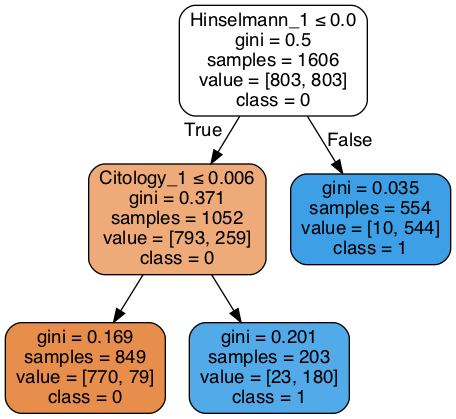

In [457]:
#view our tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

<h1>RANDOM FOREST SMOTE

<h2>Best Model So Far

In [458]:
#create instance of random forest classifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
#fit model to our training data using smote oversampling
forest.fit(X_train_smote, y_train_smote)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [459]:
#check training accuracy
forest.score(X_train_smote, y_train_smote)

0.9620174346201743

In [460]:
#check testing accuracy
forest.score(X_test, y_test)

0.9680232558139535

In [461]:
#function to plot feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


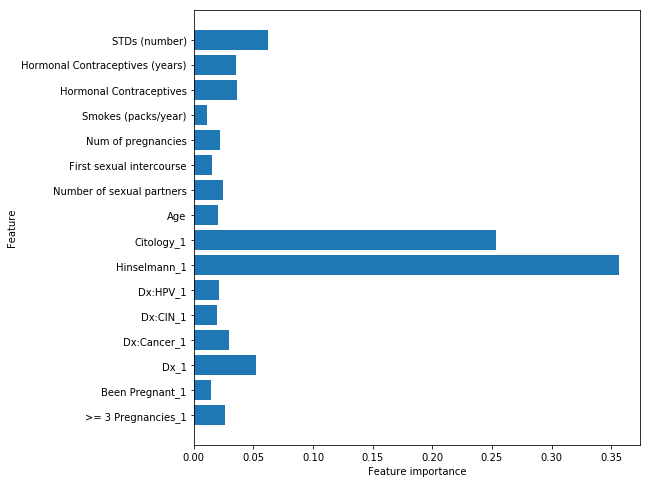

In [462]:
#check feature importance
plot_feature_importances(forest)

In [504]:
#predict on our test set
forest_pred = forest.predict(X_test)

In [465]:
# check accuracy of test set
print('Test Accuracy score: ', accuracy_score(y_test, forest_pred))
#check F1 of test set
print('Test F1 score: ', f1_score(y_test, forest_pred))

Test Accuracy score:  0.9680232558139535
Test F1 score:  0.744186046511628


In [466]:
#plot confusion matrix for test set
cnf_matrix_rf_smote = confusion_matrix(y_test, forest_pred)
print('Confusion Matrix:\n',cnf_matrix_rf_smote)

Confusion Matrix:
 [[317   8]
 [  3  16]]


In [543]:
#set up paramaters dictionary for grid search
param_grid = { 
    'n_estimators': [100, 200,300,400, 500],
    'max_features': ['auto',0.25, 0.33, 0.5],
    'max_depth' : [None,5,6,7,8,9,10],
    'min_samples_leaf': [0.03,0.04,0.05,0.06, 1, 2]
}

In [544]:
#create new instance of random forest class to be used for grid search
forest_2 = RandomForestClassifier()

In [545]:
#create instance of gridsearchCV
#use params from above
CV_rfc = GridSearchCV(estimator=forest_2, param_grid=param_grid, cv= 5,n_jobs=-1)
#fit model to our training data
CV_rfc.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 0.25, 0.33, 0.5], 'max_depth': [None, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [546]:
#check best paramaters from the grid search
CV_rfc.best_params_

{'max_depth': None,
 'max_features': 0.33,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [547]:
#use model to predict on test set
rfc_pred = CV_rfc.best_estimator_.predict(X_test)
#check accuracy on test set
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))
#check F1 of test set
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.9854651162790697
Test F1 score:  0.8780487804878049


In [548]:
#plot confusion matrix of random forest using SMOTE oversampling
cnf_matrix_rf_smote_CV = confusion_matrix(y_test, rfc_pred)
print('Confusion Matrix:\n',cnf_matrix_rf_smote_CV)

Confusion Matrix:
 [[321   4]
 [  1  18]]


In [559]:
plot_feature_importances(forest_2)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

<Figure size 576x576 with 0 Axes>

As shown in the confusion matrix above, the Random Forest model when using SMOTE oversampling seems to predict pretty well on the test data.

<h1>SAVE THE MODEL

In [522]:
#save our model
import pickle

In [524]:
# pickle list object
model_pickle_path = 'random_forest_smote.pkl'

# Create a variable to pickle and open it in write mode
model_pickle = open(model_pickle_path, 'wb')
pickle.dump(CV_rfc, model_pickle)
model_pickle.close()

In [563]:
# Loading the saved random forest smote model with pickle
rf_model_pkl = open(model_pickle_path, 'rb')
rf_model = pickle.load(rf_model_pkl)
print("Loaded model :: ", rf_model)


Loaded model ::  GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 0.25, 0.33, 0.5], 'max_depth': [None, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [564]:
#check best paramaters from the grid search
CV_rfc.best_params_

{'max_depth': None,
 'max_features': 0.33,
 'min_samples_leaf': 2,
 'n_estimators': 100}

<h1>RANDOM FOREST UPSAMPLE

In [474]:
#create instance of random forest using upsampling
forest_upsample = RandomForestClassifier(n_estimators=100, max_depth= 5)
#fit model to our upsampled training data
forest_upsample.fit(X_train_upsample, y_train_upsample)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [475]:
#check accuracy score of our training data
forest_upsample.score(X_train_upsample, y_train_upsample)

0.8849372384937239

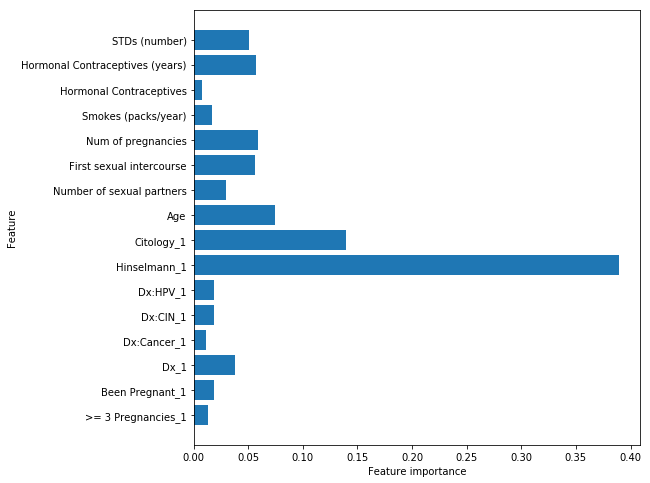

In [506]:
#check feature importance
plot_feature_importances(forest_upsample)

In [478]:
#use model to predict on test set
forest_pred_upsample = forest_upsample.predict(X_test)

In [479]:
#check accuracy score on test set
print('Test Accuracy score: ', accuracy_score(y_test, forest_pred_upsample))
#check F1 score on test set using upsampling
print('Test F1 score: ', f1_score(y_test, forest_pred_upsample))

Test Accuracy score:  0.9476744186046512
Test F1 score:  0.6086956521739131


In [480]:
#plot confusion matrix of upsampled random forest model
cnf_matrix_rf_upsample = confusion_matrix(y_test, forest_pred_upsample)
print('Confusion Matrix:\n',cnf_matrix_rf_upsample)

Confusion Matrix:
 [[312  13]
 [  5  14]]


In [481]:
#create grid search object using our paramaters from before
CV_rfc_upsample = GridSearchCV(estimator=forest_upsample, param_grid=param_grid, cv= 5,n_jobs=-1)
#fit model to our upsampled training data
CV_rfc_upsample.fit(X_train_upsample, y_train_upsample)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 0.25, 0.33, 0.5], 'max_depth': [None, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [482]:
#check best parameters
CV_rfc_upsample.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 400}

In [483]:
#use best estimator to predict on test data
rfc_pred_upsample = CV_rfc_upsample.best_estimator_.predict(X_test)
#check accuracy of test data
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred_upsample))
#check F1 score of test data
print('Test F1 score: ', f1_score(y_test, rfc_pred_upsample))

Test Accuracy score:  0.9680232558139535
Test F1 score:  0.7027027027027027


In [484]:
#plot confusion matrix of upsampled grid search random forest
cnf_matrix_rf_upsample = confusion_matrix(y_test, rfc_pred_upsample)
print('Confusion Matrix:\n',cnf_matrix_rf_upsample)

Confusion Matrix:
 [[320   5]
 [  6  13]]


<h1>XG BOOST

In [513]:
#create XGBoost instance
clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)

In [518]:
clf.fit(X_train_upsample, y_train_upsample)
training_preds = clf.predict(X_train_upsample)

In [519]:
val_preds = clf.predict(X_test)

In [520]:
training_accuracy = accuracy_score(y_train_upsample, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 90.9%
Validation accuracy: 94.77%


In [521]:
#train_f1 = f1_score(y_train, val_preds)
test_f1 = f1_score(y_test, val_preds)

#print("Train F1: %f" % (train_f1))
print("Test F1: %f" % (test_f1))

Test F1: 0.640000


<h2>K-FOLDS CROSS VALIDATION WITH XGBOOST

In [490]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [491]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=500,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results 

[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[

[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.617679,0.001419,0.617710,0.001485
1,0.558736,0.003535,0.558696,0.004201
2,0.510424,0.004976,0.510639,0.003648
3,0.467527,0.004910,0.467997,0.006325
4,0.431951,0.004370,0.432968,0.009228
5,0.401361,0.004296,0.402833,0.009590
6,0.375373,0.003744,0.376880,0.012434
7,0.351453,0.004190,0.353197,0.012838
8,0.332180,0.005162,0.334266,0.012595
9,0.315705,0.005148,0.317764,0.013650


In [492]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[13:45:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

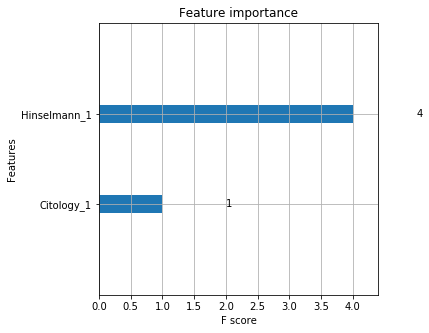

In [493]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [494]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)


gsearch1.fit(train[predictors],train[target])
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

NameError: name 'train' is not defined